# Decision Tree Algorithm From Scratch

Decision tree algorithm is one of the most popular and practical machine learningtechnique for both classification and regression. Decision trees also provide the foundation for more advanced ensemble methods such as bagging, random forests and gradient boosting.

To make implementation more clear and well-organized, the following would be several parts:


*   calculate impurity with Gini index and entropy
*   choose proper splits
*   build the tree
*   make a prediction

and final part is to put in practice.

## Classification with Gini Index

### Gini Index

The Gini index is the most widely used cost function in decision trees. This index calculates the amount of probability that a specific characteristic will be classified incorrectly when it is randomly selected.

This is an index that ranges from 0 (a pure cut) to 0.5 (a completely pure cut that divides the data equally). The Gini index is calculated as follows:\
*$Gini = 1-\sum^{n}_{i=1}(P_i)^2$* \
where *$P_i$* is the probability of having the assigned class or value.

According to the formula, the code would be:

In [1]:
import pandas as pd
import numpy as np

def gini(data):
  # the input of the function would be labels of the data and the data itself.
    data_label = data.iloc[:, -1] # get the label
    label_num = data_label.value_counts() # count the number of classes and the count within the class
    res = 0 # create a variable to recieve the probability
    for k in label_num.keys():
      # The function in second row would return a dictionary
      # for loop is to get the probability of each class
        p_k = label_num[k]/len(data_label)
        res += p_k ** 2 
    return 1 - res

In [2]:
# calculate the Gini index of each feature value to find the optimal split point
def gini_index(data, a):
  # the input: x -- the data itself; a -- the name of the feature
    feature_class = data[a].value_counts() # same for the previous function; to get the count within the feature_class
    res = [] # create a empty list to get the result
    for feature in feature_class.keys(): # the loop for each feature_class
        weight = feature_class[feature]/len(data) # return the weight for each feature_class
        gini_value = gini(data.loc[data[a] == feature]) # calculate Gini index by defined function
        res.append([feature, weight * gini_value]) # append the list with the values
    res = sorted(res, key = lambda x: x[-1])
    return res[0]

In [3]:
# to obtain the class with most labeled data
def get_most_label(data):
    data_label = data.iloc[:,-1] # to get the label
    label_sort = data_label.value_counts(sort=True) # sort the label by the count within classes
    return label_sort.keys()[0]

In [4]:
# to pick the best feature which is with lowest Gini index
def get_best_feature(data):
    features = data
    res = {} # create a empty list
    for a in features:
        temp = gini_index(data, a) #temp is a list which is like [feature_value, gini]
        res[a] = temp
    res = sorted(res.items(),key=lambda x:x[1][1])
    return res[0][0], res[0][1][0]

In [5]:
def drop_exist_feature(data, best_feature, value, type):
    attr = pd.unique(data[best_feature]) # the array that has all values of feature
    if type == 1: # split by using feature==value
        new_data = [[value], data.loc[data[best_feature] == value]]
    else:
        new_data = [attr, data.loc[data[best_feature] != value]]
    new_data[1] = new_data[1].drop([best_feature], axis=1) # remove the feature
    return new_data

In [6]:
# to build the decision tree
def create_tree(data):
    data_label = data.iloc[:,-1]
    if len(data_label.value_counts()) == 1: # only one class
        return data_label.values[0]
    if all(len(data[i].value_counts()) == 1 for i in data.iloc[:,:-1].columns): # if the feature of all data is same
        return get_most_label(data) # take the most labeled one as result
    best_feature, best_feature_value = get_best_feature(data) # get the optimal split point based on diff gini index
    Tree = {best_feature:{}} # store the tree with dict

    Tree[best_feature][best_feature_value] = create_tree(drop_exist_feature(data, best_feature, best_feature_value, 1)[1])
    Tree[best_feature]['Others'] = create_tree(drop_exist_feature(data, best_feature, best_feature_value, 2)[1])
    return Tree

In [93]:
def predict(Tree , test_data):
    first_feature = list(Tree.keys())[0] # to get the first feature
    second_dict = Tree[first_feature] # dict after the first feature
    input_first = test_data.get(first_feature) # predict the first feature value of input
    input_value = second_dict[input_first] if input_first == first_feature else second_dict['Others'] # predict the dictionary corresponding to the input
    if isinstance(input_value , dict): # check if the branch is dict?
        class_label = predict(input_value, test_data)
    else:
        class_label = input_value
    return class_label

In [94]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from math import log

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666666)

In [95]:
data = pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1)
data.columns = ['a','b','c','d', 'label']
decision_Tree = create_tree(data)


In [83]:
# def predict(Tree , test_data):
first_feature = list(decision_Tree.keys())[0] # to get the first feature
second_dict = decision_Tree[first_feature] # dict after the first feature
input_first = x_test.loc[22].get(first_feature) # predict the first feature value of input
input_value = second_dict[input_first] if input_first == first_feature else second_dict['Others'] # predict the dictionary corresponding to the input
if isinstance(input_value , dict): # check if the branch is dict?
        class_label = predict(input_value, x_test.loc[22])
else:
        class_label = input_value
print(class_label)

1


In [96]:
x_test = pd.DataFrame(x_test)
x_test.columns = ['a','b','c','d']
# print(x_test)
y_pred = []
for i in range(x_test.shape[0]):
  result = predict(decision_Tree,x_test.loc[i])
  y_pred.append(result)

## Classification with entropy

### Entropy

Entropy can be used to scale the uncertainty of random variable. The greater random variable's entropy is, the more uncertainty it has.\
$Entropy=-\sum^{n}_{i=1}p_ilog(p_i)$,\
where $p_i$ is the probability of the class or value.

In [4]:
def entropy(label):
    counter = Counter(label) # Count the number of occurrences of different elements and the return value can be generated as a dictionary
    ent = 0
    for num in counter.values():
        p = num / len(label)
        ent += -p * log(p)
    return ent

In [5]:
# to split the data
def split(x_data, y_label, dimension, value):
  # the input would be: x_data--data with features; y_label--labels; dimension--the index of the feature; value--the value of the feature
    index_left = (x_data[:,dimension] <= value)
    index_right = (x_data[:,dimension] > value)
    return x_data[index_left], x_data[index_right], y_label[index_left], y_label[index_right]

In [6]:
# to traverse all the dimensions, looking for the right number to split, to find the feature and the number to minimize entropy
def one_split(x_data, y_label):
    
    best_entropy = float('inf')
    best_dimension = -1
    best_value = -1
    
    for d in range(x_data.shape[1]):
        sorted_index = np.argsort(x_data[:, d])
        for i in range(1,len(x_data)):
            if x_data[sorted_index[i], d] != x_data[sorted_index[i - 1], d]:
                value = (x_data[sorted_index[i], d] + x_data[sorted_index[i-1], d]) / 2
                x_left, x_right, y_left, y_right = split(x_data, y_label, d, value)
                
                p_left = len(x_left) / len(x_data)
                p_right = len(x_right) / len(x_data)
                
                ent = p_left * entropy(y_left) + p_right * entropy(y_right)
                if ent < best_entropy:
                    best_entropy = ent
                    best_dimension = d
                    best_value = value
    return best_entropy, best_dimension, best_value

In [7]:
class Node:
    def __init__(self,x_data, y_label, dimension, value):
        self.x_data = x_data
        self.y_label = y_label
        self.dimension = dimension
        self.value = value
        self.left = None
        self.right = None

In [8]:
def create_tree(x_data, y_label):
    ent, dim, value = one_split(x_data, y_label)
    x_left, x_right, y_left, y_right = split(x_data, y_label, dim, value)
    node = Node(x_data, y_label, dim, value)
    if ent < 0.000000001:
      return node
    node.left = create_tree(x_left, y_left)
    node.right = create_tree(x_right, y_right)
    return node

In [9]:
def travel(x_data, node):
    p = node
    if x_data[p.dimension] <= p.value and p.left:
        pred = travel(x_data, p.left)
    elif x_data[p.dimension] > p.value and p.right:
        pred = travel(x_data, p.right)
    else:
        counter = Counter(p.y_label)
        pred = counter.most_common(1)[0][0]
    return pred

In [10]:
def predict(tree, x_predict):
    y_predict = []
    for data in x_predict:
      y_pred = travel(data, tree)
      y_predict.append(y_pred)
    return np.array(y_predict)

In [18]:
def score(tree, x_test, y_test):
    y_predict = predict(tree, x_test)
    return np.sum(y_predict == y_test) / len(y_predict)

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from math import log

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666666)

In [21]:
tree = create_tree(x_train, y_train)
y_pred = predict(tree,x_test)
print(y_pred)
sc = score(tree, x_test, y_test)
print(sc)

0.9333333333333333


## Regression model

The decision tree regression model can be interpreted as a set of if-else statements, and it is widely used due to its simplicity, interpretability, and ability to handle nonlinear relationships between the input and target variables.

In [1]:
# calculate the square error
def squaErr(data, result, sequence, parameter, divide):
    # input data: data--x, result--y, sequence--for index, divede--index of split point;
    
    # to pick the data we are going to use
    left = []
    right = []
    for i in sequence:
        if data[i,parameter]<divide:
            left.append(i)
        else:
            right.append(i)
            
    # to calculate the square error on left and right regions
    c1 = np.mean(result[left])
    err1 = np.sum((result[left]-c1)**2)

    c2 = np.mean(result[right])
    err2 = np.sum((result[right]-c2)**2)
    
    return err1+err2

In [2]:
# traverse all to determine the next split point and value
def bestdivide(data,result,sequence):
    min_para = 0
    sortedValue = np.sort(data[sequence][:,min_para]) # sort the feature/data by the result
    min_divide = (sortedValue[0]+sortedValue[1])/2 # start splitting with middle one
    err = squaErr(data,result,sequence,min_para,min_divide) # calculate square error by calling defined function

    for para in range(data.shape[1]):
        # update/generate a set of split point with one feature
        sortedValue = np.sort(data[sequence][:,para]) # sort the data corresponding to the dividing point
        sliceValue = (sortedValue[1:]+sortedValue[:-1])/2 # split from the middle
        for divide in sliceValue:
            errNew = squaErr(data,result,sequence,para,divide) # calcalate the squaError
            if errNew < err:
              # if new error is less, then update
                err = errNew
                min_para = para
                min_divide = divide 
    return min_para, min_divide, err

In [3]:
# we need a class defining the tree
class RegressionTree:
    def __init__(self,sequence):
        self.isLeaf = True # if it is a leaf/node
        self.left =None
        self.right = None
        self.output = np.mean(result[sequence])
        self.sequence = sequence
        self.parameter = None
        self.divide = None
		
    # define the action (grow function) for the tree, grow from current node/leaf
    def grow(self, minnum):
            if (len(self.sequence)<= minnum):
              # minimal number of elements
                return
            parameter,divide,err = bestdivide(data, result, self.sequence)
            left = []
            right =[]
            for i in self.sequence:
                if(data[i,parameter]<divide):
                    left.append(i)
                else:
                    right.append(i)
            self.parameter = parameter
            self.divide = divide
            self.isLeaf = False
            self.left = RegressionTree(left)
            self.right = RegressionTree(right)

In [4]:
def updateTree(tree,minNum):
    if tree.isLeaf:
      tree.grow(minNum)
    else:
      updateTree(tree.left, minNum)
      updateTree(tree.right, minNum)

In [5]:
def train(data,result,minNum = 1,maxLevel = 5):
    # self.data = data
    # self.result = result
    # minNum = minNum
    # self.maxLevel = maxLevel
    tree = RegressionTree(range(data.shape[0]))
		
    # The number of decision tree grows is determined by maxLevel
    for i in range(maxLevel):
      updateTree(tree, minNum)
    return tree

In [6]:
# Make predictions on single point        
def singlePredict(tree, data):
  if(tree==None):
    return None
  tree = tree
  while(True):
    if(tree.isLeaf):
      return tree.output
    if(data[tree.parameter]<tree.divide):
      tree = tree.left
    else:
      tree = tree.right

In [11]:
# predict the data according to the trained model
def predict(tree, data):
  result = []
  if(tree==None):
    return None
  for i in range (data.shape[0]):
    result.append(singlePredict(tree, data[i]))
  return result

In [15]:
# load data from sklearn
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
result = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(data, result, test_size=0.3, random_state=66666)

In [16]:
tree = train(X_train,y_train,2,10)
result1 = predict(tree, X_test)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
# calculate the maximum squared error   
def err(result, y):
    err = (result-y)**2
    return err.sum()

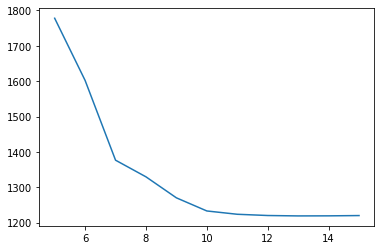

In [17]:
# Look at the error trend by traversing the tree from 5 to 15 levels
errs =[]
for i in range(5,16):
    tree = train(X_train,y_train,2,i)
    errs.append(err(predict(tree,X_test),y_test))

# plot the trend	
plt.plot(range(5,16),errs)